**Brian Blaylock**  
*January 4, 2021*

# GLM Field of View Edges
GLM FOV edges from a file obtained from Katrina Virts and Scott Rudlosky in an email January 4, 2021. These are the FOV edges used in the paper _[Initial Geostationary Lightning Mapper Observations (Rudlosky et al. 2018)](https://doi.org/10.1029/2018GL081052)_

> Hi Brian,
>
> The attached file contains nominal FOV boundaries for GLM-16 when in test position (the first ~6 months after launch) and in GOES-East position at -75.2W, and for GLM-17 in GOES-West position at -137.2W in normal and inverted orientations. As Scott mentioned, GOES-17 undergoes biannual yaw flips. In the figure he attached, the solid (dashed) line depicts coverage during boreal summer (winter) when GLM-17 is in normal (inverted) orientation.
>
>Please let me know if you have any questions.  Thanks!
>
>Katrina

Contact them if you need the exact edges of the GLM FOV. Otherwise, the estimated boundary I derive here (patterned after glmtools) is pretty close. 

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from BB_maps.add_to_cartopy import common_features, pc

# this just needed to display facecolor as transparent in this notebook...
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'w'
%config InlineBackend.print_figure_kwargs={'facecolor' : 'none'}

WARNING! No module named 'dask'
Without dask, you cannot use dask for multiprocessing.


/p/home/blaylock/BB_python/Carpenter_Workshop/toolbox/cartopy_tools.py:33: UserWarning: No module named 'geopandas' Without geopandas, you cannot subset some NaturalEarthFeatures, like "Major Highways" from roads.
  warnings.warn(


In [2]:
g = xr.open_dataset('GLM_FOV_edges.nc')

In [3]:
g

<xarray.Dataset>
Dimensions:               (1: 1, n16: 3844, n17: 3848)
Dimensions without coordinates: 1, n16, n17
Data variables:
    G16_fov_lat           (1, n16) float64 ...
    G16_fov_lon           (1, n16) float64 ...
    test_fov_lat          (1, n16) float64 ...
    test_fov_lon          (1, n16) float64 ...
    G17_fov_lat           (1, n17) float64 ...
    G17_fov_lon           (1, n17) float64 ...
    G17_fov_lat_inverted  (1, n17) float64 ...
    G17_fov_lon_inverted  (1, n17) float64 ...
Attributes:
    summary:  Nominal latitude/longitude edges of GLM FOV
    source:   Prepared by Katrina Virts (NASA/MSFC; katrina.virts@uah.edu) ba...

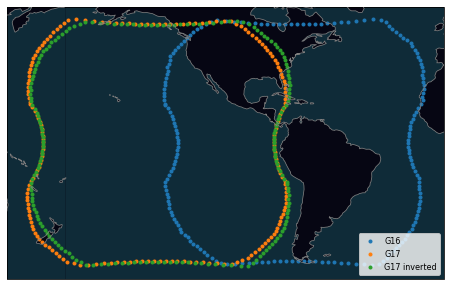

In [6]:
ax = common_features(crs=ccrs.PlateCarree(central_longitude=-100),
                     OCEAN=True, dark=True, figsize=[10,5])
kwargs = dict(transform=pc, marker='.')
thin = 20
ax.scatter(g.G16_fov_lon.thin(thin), g.G16_fov_lat.thin(thin), label='G16', **kwargs)
ax.scatter(g.G17_fov_lon.thin(thin), g.G17_fov_lat.thin(thin), label='G17', **kwargs)
ax.scatter(g.G17_fov_lon_inverted.thin(thin), g.G17_fov_lat_inverted.thin(thin), label='G17 inverted', **kwargs)
plt.legend(fontsize=8, loc=4)

## How is this edge different than my estimated boundary in `goes2go.tools.field_of_view`?

# GOES-East

In [7]:
from goes2go.data import goes_latest

In [8]:
# Get a sample GLM file
glm = goes_latest(satellite=16, product='GLM')

 _______________________________
 | Satellite: noaa-goes16      |
 |   Product: GLM-L2-LCFA      |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes16/GLM-L2-LCFA].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

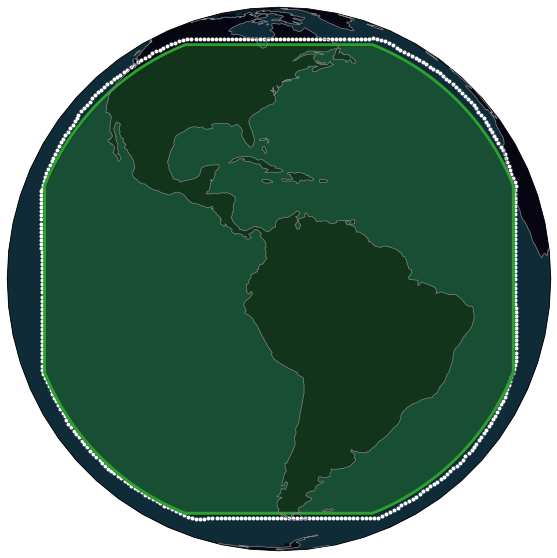

In [10]:
ax = common_features(crs=glm.FOV.crs, figsize=[10,10],
                     dark=True, OCEAN=True)

# Plot estimated GLM field-of-view
ax.add_geometries([glm.FOV.full_disk], crs=glm.FOV.crs,
                   facecolor='tab:green', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([glm.FOV.full_disk], crs=glm.FOV.crs,
                   facecolor='none', edgecolor='tab:green', alpha=1, linewidth=3)

# Plot the actual GLM FOV from Katrina
thin=10
ax.scatter(g.G16_fov_lon.thin(thin),
           g.G16_fov_lat.thin(thin),
           color='w', label='G16', **kwargs)

ax.set_global()

How does that look on a rectangular grid?

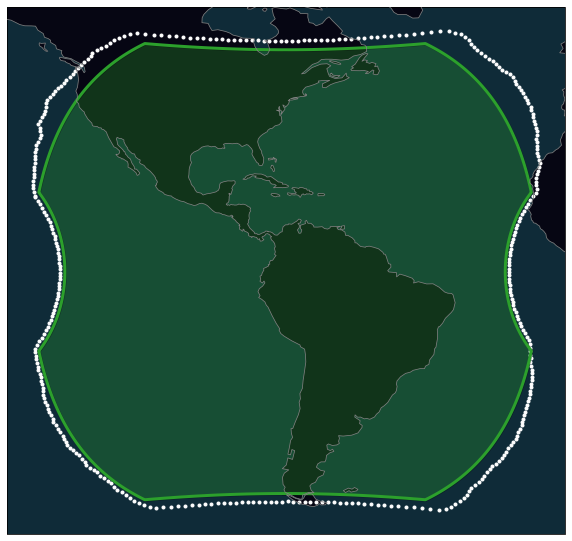

In [11]:
ax = common_features(crs=pc, figsize=[10,10],
                     dark=True, OCEAN=True)
ax.add_geometries([glm.FOV.full_disk], crs=glm.FOV.crs,
                   facecolor='tab:green', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([glm.FOV.full_disk], crs=glm.FOV.crs,
                   facecolor='none', edgecolor='tab:green', alpha=1, linewidth=3)

thin=10
ax.scatter(g.G16_fov_lon.thin(thin),
           g.G16_fov_lat.thin(thin),
           color='w', label='G16', **kwargs)

My estimated FOV based on the instrument specs does pretty good to mimic the actual GLM FOV, except for the curved corners. I'm not sure why--must be instrument design.

# GOES-West
A yaw flip changes the boundary for GOES-17 twice a year

 _______________________________
 | Satellite: noaa-goes17      |
 |   Product: GLM-L2-LCFA      |
📦 Finished downloading [1] files to [/p/cwfs/blaylock/data/noaa-goes17/GLM-L2-LCFA].                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

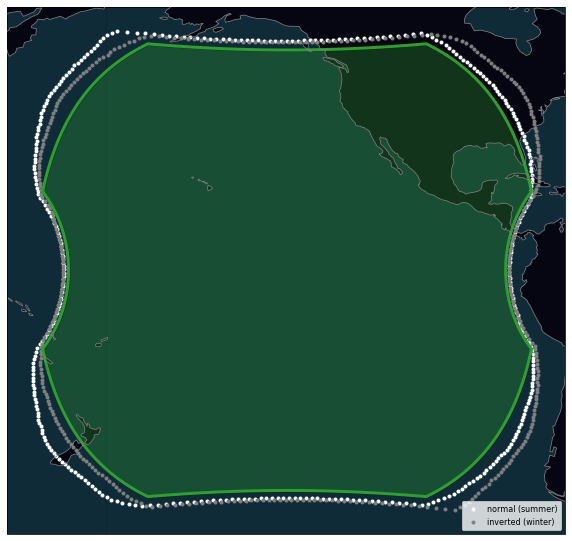

In [14]:
# Get a sample GLM file
glm = goes_latest(satellite=17, product='GLM')

ax = common_features(crs=ccrs.PlateCarree(central_longitude=-100), figsize=[10,10],
                     dark=True, OCEAN=True)
ax.add_geometries([glm.FOV.full_disk], crs=glm.FOV.crs,
                   facecolor='tab:green', edgecolor='k', alpha=0.3, linewidth=3)
ax.add_geometries([glm.FOV.full_disk], crs=glm.FOV.crs,
                   facecolor='none', edgecolor='tab:green', alpha=1, linewidth=3)

thin=10
ax.scatter(g.G17_fov_lon.thin(thin),
           g.G17_fov_lat.thin(thin),
           color='w', label='normal (summer)', **kwargs)

ax.scatter(g.G17_fov_lon_inverted.thin(thin),
           g.G17_fov_lat_inverted.thin(thin),
           color='.5', label='inverted (winter)', **kwargs)
plt.legend(loc=4, fontsize=8)